<center>
<h1><b>Lab 3</b></h1>
<h1>PHYS 580 - Computational Physics</h1>
<h2>Professor Molnar</h2>
</br>
<h3><b>Ethan Knox</b></h3>
<h4>https://www.github.com/ethank5149</h4>
<h4>ethank5149@gmail.com</h4>
</br>
</br>
<h3><b>September 17, 2020</b></h3>
</center>

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

### Support Functions

In [2]:
def euler_step(f, y, t, dt):
    y = y + f(t, y) * dt
    return y


def rk2_step(f, y, t, dt):
    k1 = dt * f(t, y)
    k2 = dt * f(t + dt, y + k1)
    y = y + (k1 + k2) / 2.0
    return y


def rk4_step(f, y, t, dt):
    k1 = dt * f(t, y)
    k2 = dt * f(t + 0.5 * dt, y + 0.5 * k1)
    k3 = dt * f(t + 0.5 * dt, y + 0.5 * k2)
    k4 = dt * f(t + dt, y + k3)
    y = y + (k1 + 2.0 * (k2 + k3) + k4) / 6.0
    return 


def euler_cromer_step(f, y, dy, t, dt):
    dy = dy + f(t, y, dy) * dt
    y = y + dy * dt
    return y, dy


def dsolve(f, t, y0, step = euler_step):
    t = np.asarray(t)  # Ensure t is a Numpy array
    y0 = np.asarray(y0)

    y = np.zeros((np.size(t), np.size(y0)))  # Create our output data container
    y[0] = y0  # Set initial condition

    for i in range(np.size(t)-1):
        y[i+1] = step(f, y[i], t[i], t[i+1] - t[i])  # Step forward
    return t, y


def dsolve_simplectic(f, t, y0, dy0, step = euler_cromer_step):
    t = np.asarray(t)  # Ensure t is a Numpy array
    y0 = np.asarray(y0)

    y = np.zeros((np.size(t), np.size(y0)))  # Create our output data container
    dy = np.zeros((np.size(t), np.size(dy0)))  # Create our output data container
    y[0] = y0  # Set initial condition
    dy[0] = dy0  # Set initial condition

    for i in range(np.size(t)-1):
        y[i+1], dy[i+1] = step(f, y[i], dy[i], t[i], t[i+1] - t[i])  # Step forward

    return t, y, dy


def get_kinetic_energy(I, omega):
    return 0.5 * I * omega ** 2


def get_potential_energy(m, g, l, theta):
    return m * g * l * (1.0 - np.cos(theta))


def get_total_energy(m, I, l, g, theta, omega):
    return get_kinetic_energy(I, omega) + get_potential_energy(m, g, l, theta)


def global_error(exact, calculated):
    return calculated - exact


def local_error(y_exact, y_approx, x):
    error = np.zeros_like(x)
    for i in np.arange(1, len(error)):
        error[i-1] = y_exact(x[i]) - y_exact(x[i-1]) - (y_approx[i] - y_approx[i-1])
    return error

In [62]:
from sympy import symbols, Function, Derivative, Eq
import sympy as sp

beta, omega_0, omega_d, A, t, theta0, dtheta0, m, k, g = sp.symbols(r'\beta \omega_0 \omega_D A t \theta_0 \dot{\theta}_0 m k g')
theta = sp.Function(r'\theta')

# ode = sp.Eq(sp.Derivative(theta(t), t, t) + 2*omega_0*beta*sp.Derivative(theta(t), t) + omega_0**2*theta(t),A*sp.exp(sp.I*omega_d*t))

ode = sp.Eq(sp.Derivative(theta(t), t, t) + 2*omega_0*beta*sp.Derivative(theta(t), t) + omega_0**2*theta(t),A*sp.cos(omega_d*t))
ics = {theta(0): theta0, theta(t).diff(t).subs(t, 0): dtheta0}

sp.dsolve(ode, theta(t), ics=ics)
# exact = sp.lambdify([t, (theta0, dtheta0, beta, omega_0, A, omega_D, A)], soln.rhs, 'numpy')

Eq(\theta(t), 2*A*\beta*\omega_0*\omega_D*sin(\omega_D*t)/(4*\beta**2*\omega_0**2*\omega_D**2 + (\omega_0**2 - \omega_D**2)**2) + A*\omega_0**2*cos(\omega_D*t)/(4*\beta**2*\omega_0**2*\omega_D**2 + (\omega_0**2 - \omega_D**2)**2) - A*\omega_D**2*cos(\omega_D*t)/(4*\beta**2*\omega_0**2*\omega_D**2 + (\omega_0**2 - \omega_D**2)**2) + (-A*\beta*\omega_0**3 - A*\beta*\omega_0*\omega_D**2 - A*\omega_0**3*sqrt(\beta**2 - 1) + A*\omega_0*\omega_D**2*sqrt(\beta**2 - 1) + 4*\beta**3*\omega_0**3*\omega_D**2*\theta_0 + 4*\beta**2*\dot{\theta}_0*\omega_0**2*\omega_D**2 + 4*\beta**2*\omega_0**3*\omega_D**2*\theta_0*sqrt(\beta**2 - 1) + \beta*\omega_0**5*\theta_0 - 2*\beta*\omega_0**3*\omega_D**2*\theta_0 + \beta*\omega_0*\omega_D**4*\theta_0 + \dot{\theta}_0*\omega_0**4 - 2*\dot{\theta}_0*\omega_0**2*\omega_D**2 + \dot{\theta}_0*\omega_D**4 + \omega_0**5*\theta_0*sqrt(\beta**2 - 1) - 2*\omega_0**3*\omega_D**2*\theta_0*sqrt(\beta**2 - 1) + \omega_0*\omega_D**4*\theta_0*sqrt(\beta**2 - 1))*exp(\omega

In [64]:
sp.solve([sp.Eq(2*beta*omega_0,k/m),sp.Eq()],beta)

[k/(2*\omega_0*m)]

In [39]:
def df_linear_pendula(t, x, beta, omega_0, A, omega_D):
    return np.asarray([x[1], -2 * beta * omega_0 * x[1] - omega_0 ** 2 * x[0] + A * np.cos(omega_D * t)])

def df_nonlinear_pendula(t, x, beta, omega_0, A, omega_D):
    return np.asarray([x[1], -2 * beta * omega_0 * x[1] - omega_0 ** 2 * np.sin(x[0]) + A * np.cos(omega_D * t)])


def df_linear_pendula_simplectic(t, x, dx, beta, omega_0, A, omega_D):
    return -2 * beta * omega_0 * dx - omega_0 ** 2 * x + A * np.cos(omega_D * t)

def df_nonlinear_pendula_simplectic(t, x, dx, beta, omega_0, A, omega_D):
    return -2 * beta * omega_0 * dx - omega_0 ** 2 * np.sin(x) + A * np.cos(omega_D * t)


def df_pendula_simplectic(t, x, dx, beta, omega_0, A, omega_D):
    return -beta * omega_0 * dx - omega_0 ** 2 * x + A * np.cos(omega_D * t)

# Part 1

## Parameters

In [65]:
m = 1.0
c = 0.0
k = 1.0

omega_0 = np.sqrt(k/m)
beta = c/(2*np.sqrt(m*k))  # Damping ratio

A = 0.0
omega_D = 1.0

theta0 = np.pi / 6.0
dtheta0 = 0.0

ti = 0
tf = 25
dt = 0.001
t = np.arange(ti, tf, dt)
state0 = np.asarray([theta0, dtheta0])

## Calculate Trajectories

In [66]:
## Curried differential equation
df = partial(df_linear_pendula, beta=beta, omega_0=omega_0, A=A, omega_D=omega_D)
df_simplectic = partial(df_linear_pendula_simplectic, beta=beta, omega_0=omega_0, A=A, omega_D=omega_D)

## Solutions
t, pendula_euler = dsolve(df, t, state0, step=euler_step)
t, pendula_rk2 = dsolve(df, t, state0, step=euler_step)
t, pendula_rk4 = dsolve(df, t, state0, step=euler_step)
t, *pendula_euler_cromer = dsolve_simplectic(df_simplectic, t, theta0, dtheta0)

## Split up into theta and dtheta
pendula_euler_trajectory = np.hsplit(pendula_euler, 2)
pendula_rk2_trajectory = np.hsplit(pendula_rk2, 2)
pendula_rk4_trajectory = np.hsplit(pendula_rk4, 2)
pendula_euler_cromer_trajectory = pendula_euler_cromer

## Energies
# pendula_euler_energy = get_total_energy(m, I, l, g, *pendula_euler_trajectory)
# pendula_rk2_energy = get_total_energy(m, I, l, g, *pendula_rk2_trajectory)
# pendula_rk4_energy = get_total_energy(m, I, l, g, *pendula_rk4_trajectory)
# pendula_euler_cromer_energy = get_total_energy(m, I, l, g, *pendula_euler_cromer_trajectory)

## Plotting

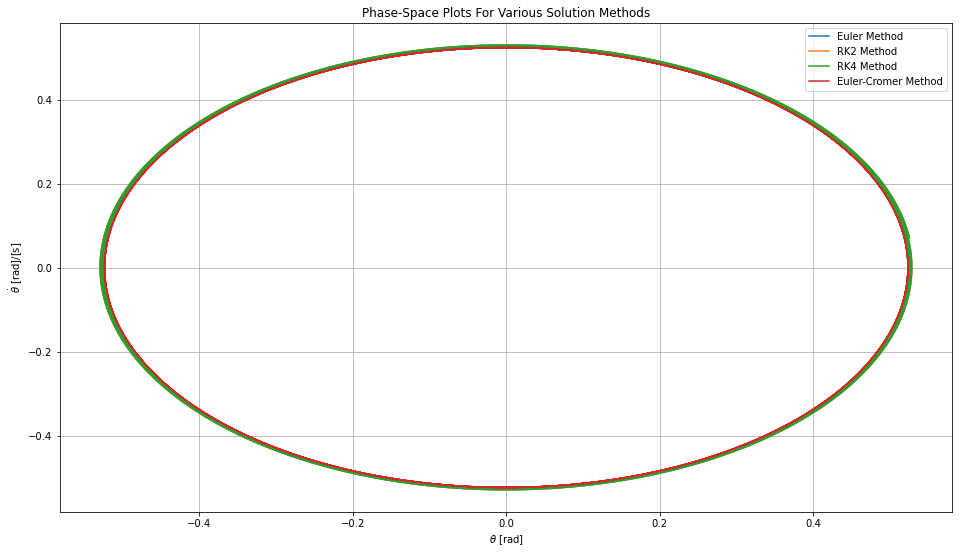

In [67]:
fig = plt.figure(figsize=(16, 9))
ax = plt.axes()

plt.plot(*pendula_euler_trajectory, label='Euler Method')
plt.plot(*pendula_rk2_trajectory, label='RK2 Method')
plt.plot(*pendula_rk4_trajectory, label='RK4 Method')
plt.plot(*pendula_euler_cromer_trajectory, label='Euler-Cromer Method')

plt.xlabel(r'$\theta$ [rad]')
plt.ylabel(r'$\dot{\theta}$ [rad]/[s]')
plt.title('Phase-Space Plots For Various Solution Methods')

plt.grid()
plt.legend()
plt.show()

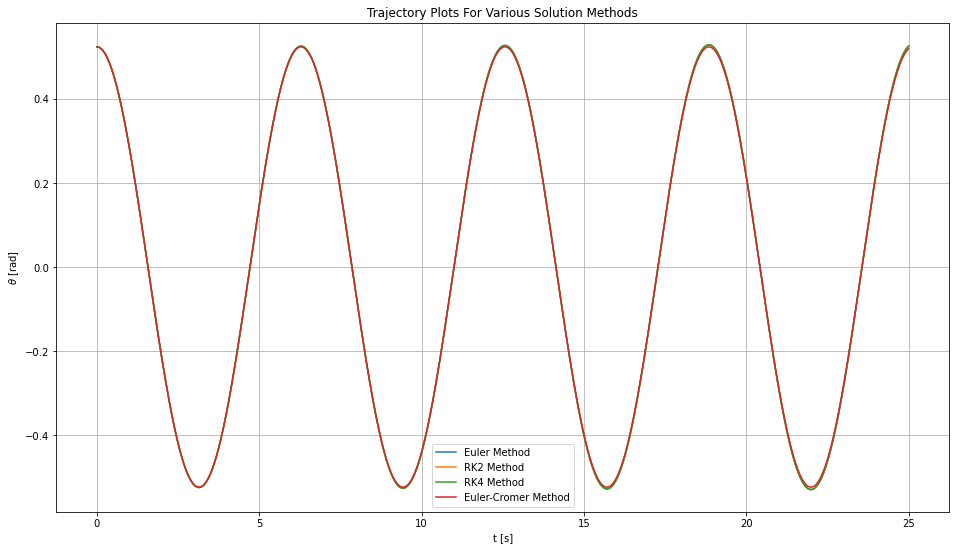

In [59]:
fig = plt.figure(figsize=(16, 9))
ax = plt.axes()

plt.plot(t, pendula_euler_trajectory[0], label='Euler Method')
plt.plot(t, pendula_rk2_trajectory[0], label='RK2 Method')
plt.plot(t, pendula_rk4_trajectory[0], label='RK4 Method')
plt.plot(t, pendula_euler_cromer_trajectory[0], label='Euler-Cromer Method')

plt.xlabel(r't [s]')
plt.ylabel(r'$\theta$ [rad]')
plt.title('Trajectory Plots For Various Solution Methods')

plt.grid()
plt.legend()
plt.show()

# Part 2

## Parameters